In [1]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime as dt
import altair as alt
%matplotlib inline

In [2]:
june_trip = pd.read_csv('data/june_trip.csv')
june_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01 00:00:00,00:02:18.203333,2019-06-01 00:00:00,00:06:16.406666,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01 00:00:00,00:02:44.803333,2019-06-01 00:00:00,00:07:28.286666,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01 00:00:00,00:09:56,2019-06-01 00:00:00,00:21:56,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01 00:00:00,00:10:31.163333,2019-06-01 00:00:00,00:12:02.773333,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01 00:00:00,00:07:21.430000,2019-06-01 00:00:00,00:12:30.913333,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000


In [13]:
#Total Count of scooters that belong to each company sorted by ID number.
june_trips_groups = june_trip.groupby('companyName')['sumdID'].nunique()
june_trips_groups

companyName
Bird             2864
Bolt Mobility     329
Gotcha            133
JUMP              182
Lime             1423
Lyft             1141
SPIN              670
Name: sumdID, dtype: int64

In [4]:
#Numbers of scooters with zero trip Duration
zero_june_trip = june_trip.loc[june_trip['tripDuration'] == 0]
zero_june_trip.companyName.value_counts()

Bird    1501
Lime      78
Name: companyName, dtype: int64

In [15]:
june_trip['companyName'].describe()

count     205627
unique         7
top         Lime
freq       84728
Name: companyName, dtype: object

In [8]:
bird_total = june_trip.loc[june_trip['companyName'] == 'Bird']
bird_total.sumdID.value_counts()

PoweredUNKNOWN    1120
PoweredJK1DE        49
PoweredJ8UN1        49
PoweredLF7ND        48
PoweredMIQMC        48
                  ... 
Powered1YULZ         1
Powered76RUM         1
Powered6S91S         1
PoweredBAAXZ         1
PoweredDHRNE         1
Name: sumdID, Length: 2864, dtype: int64

In [9]:
PoweredUNKNOWN = bird_total.loc[bird_total['sumdID'] == 'PoweredUNKNOWN']
PoweredUNKNOWN.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
43,2019-06-01 00:25:47.827000,Bird,BRD3705,PoweredUNKNOWN,0.0,0.0,2019-06-01 00:00:00,00:27:11.406666,2019-06-01 00:00:00,00:27:21.493333,36.1449,-86.8093,36.1449,-86.8093,[],2019-06-02 05:30:21.813000
47,2019-06-01 00:25:47.827000,Bird,BRD3704,PoweredUNKNOWN,0.0,0.0,2019-06-01 00:00:00,00:27:29.580000,2019-06-01 00:00:00,00:27:39.063333,36.1449,-86.8093,36.1449,-86.8093,[],2019-06-02 05:30:21.783000
69,2019-06-01 00:30:47.943000,Bird,BRD3737,PoweredUNKNOWN,0.0,0.0,2019-06-01 00:00:00,00:32:15.626666,2019-06-01 00:00:00,00:32:25.553333,36.1590,-86.7757,36.1590,-86.7757,[],2019-06-02 05:30:22.403000
110,2019-06-01 00:40:48.323000,Bird,BRD3800,PoweredUNKNOWN,1.0,0.0,2019-06-01 00:00:00,00:40:11.770000,2019-06-01 00:00:00,00:40:50.926666,36.1237,-86.7896,36.1237,-86.7896,[],2019-06-02 05:30:24.033000
114,2019-06-01 00:40:48.323000,Bird,BRD3799,PoweredUNKNOWN,0.0,0.0,2019-06-01 00:00:00,00:42:33.976666,2019-06-01 00:00:00,00:42:47.656666,36.1777,-86.7504,36.1777,-86.7504,[],2019-06-02 05:30:24


In [14]:
#Create a map object of the city of Nashville
nashville_tn_map= folium.Map(location=[36.1627, -86.7816], zoom_start=12)
june_subset2 = PoweredUNKNOWN.head(1120)

# Display only the where Lime scooters are found
for lat, lng, label in zip(june_subset2.startLatitude, june_subset2.endLongitude, june_subset2.companyName.astype(str)):
    if label!='0':
        folium.features.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(nashville_tn_map)
    
# Show map
display(nashville_tn_map)

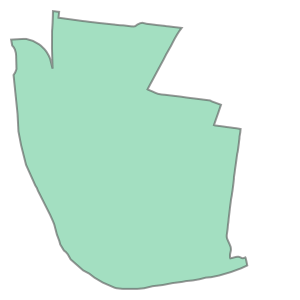

In [11]:
promise_zones = gpd.read_file('MDHA_Promise_Zones/Export_Output_5.shp')
promise_zones.loc[0, 'geometry']

In [12]:
folium.GeoJson(promise_zones).add_to(nashville_tn_map)
nashville_tn_map

#code for converting our dates to day of week:
import datetime
may_df['datetime'] = may_df.apply(lambda x: datetime.datetime(2019, x['Month'], x['Day'], x['Hour']), axis=1)
may_df['day_of_week'] = may_df['datetime'].dt.day_name() 